# **When Should You Upload Your Data Videos?**

<div style="text-align: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e1/Logo_of_YouTube_%282015-2017%29.svg/1280px-Logo_of_YouTube_%282015-2017%29.svg.png" width="800"/>
</div>


In [1]:
from utils.functions import get_data_youtue
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Get Data

In [2]:
# List of channel that you want to collect data.
handles = ["@DarshilParmar",
           "@seattledataguy",
           "@CodeWithYu",
           "@alexmerced-openlakehousead2617",
           "@eczachly_",
           "@kahandatasolutions",
           "@thedataengineeringshow",
           "@AlexTheAnalyst"
          ]

In [3]:
# Fields included: id, channelTitle, title, description, tags, viewCount, likeCount
# favoriteCount, commentCount, duration, definition, caption, publishedOn (day's name), datepublished, timepublished
# To advoid too many calls from API, comment the below line after you load the data to local folder
get_data_youtue(handles)

# Then load the data from local folder
df = pd.read_csv('data/youtube_data.csv')

Getting video information from channel: Darshil Parmar
Getting video information from channel: Seattle Data Guy
Getting video information from channel: CodeWithYu
Getting video information from channel: Alex Merced - Open Lakehouse Advocate
Getting video information from channel: Data with Zach
Getting video information from channel: Kahan Data Solutions
Getting video information from channel: The Data Engineering Show - Podcast
Getting video information from channel: Alex The Analyst
Done!


## Explore Data

First, let's look through channel statistic. You can either use `functions.get_channel_stats` module or get the data from df.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1179 non-null   object 
 1   channelTitle   1179 non-null   object 
 2   title          1179 non-null   object 
 3   description    1131 non-null   object 
 4   tags           1026 non-null   object 
 5   viewCount      1179 non-null   float64
 6   likeCount      1176 non-null   float64
 7   favoriteCount  1179 non-null   float64
 8   commentCount   1179 non-null   float64
 9   duration       1179 non-null   float64
 10  definition     1179 non-null   object 
 11  caption        1179 non-null   bool   
 12  publishedOn    1179 non-null   object 
 13  datepublished  1179 non-null   object 
 14  timepublished  1179 non-null   object 
dtypes: bool(1), float64(5), object(9)
memory usage: 130.2+ KB


In [17]:
# Get channel's stats
upload_count = df.groupby('channelTitle').size().reset_index(name='Number of videos')
view_like_sum = df.groupby('channelTitle')[['viewCount', 'likeCount']].sum().reset_index()
merge_df = pd.merge(upload_count, view_like_sum, on='channelTitle').rename(columns = {'viewCount': 'Total views', 'likeCount':'Total likes' })
merge_df['Views per video ratio'] = round(merge_df['Total views'] / merge_df['Number of videos'],2)
merge_df['Likes per view ratio']  = round(merge_df['Total likes'] / merge_df['Total views'],4)

merge_df


,channelTitle,Number of videos,Total views,Total likes,Views per video ratio,Likes per view ratio
0,Alex Merced - Open Lakehouse Advocate,19,12941.0,150.0,681.11,0.0116
1,Alex The Analyst,331,41489180.0,1030148.0,125344.95,0.0248
2,CodeWithYu,67,673054.0,17547.0,10045.58,0.0261
3,Darshil Parmar,158,7633901.0,231107.0,48315.83,0.0303
4,Data with Zach,52,1244458.0,44730.0,23931.88,0.0359
5,Kahan Data Solutions,208,4313547.0,57253.0,20738.21,0.0133
6,Seattle Data Guy,279,5421107.0,142662.0,19430.49,0.0263
7,The Data Engineering Show - Podcast,65,70382.0,1479.0,1082.80,0.0210


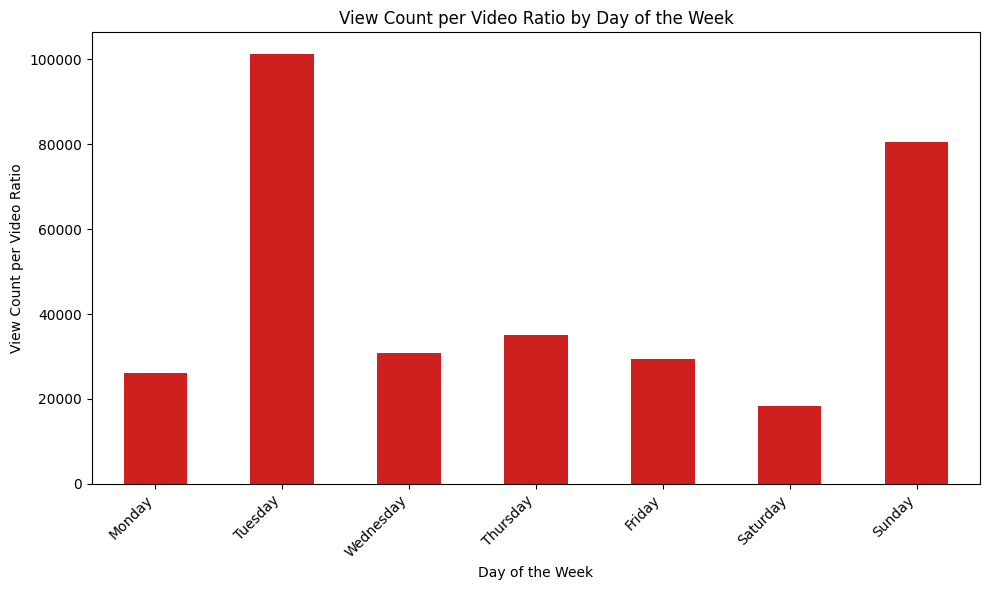

In [18]:
df_grouped = df.groupby(['publishedOn']).agg({'viewCount': 'sum', 'id': 'count'}).reset_index()

# Calculate the view count per video for each day
df_grouped['view_per_video_ratio'] = df_grouped['viewCount'] / df_grouped['id']

# Order of days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
view_counts_by_day = df_grouped.set_index('publishedOn').reindex(days_order)

# Plot the data
plt.figure(figsize=(10, 6))
view_counts_by_day['view_per_video_ratio'].plot(kind='bar', color='#CD201F')

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('View Count per Video Ratio')
plt.title('View Count per Video Ratio by Day of the Week')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


Tuesday's view per video ratio is so high that it doesn't make much sense. Some assumptions can be made, such as that there are some channels that only upload on Tuesday, or that a channel with a high view per video ratio uploads its videos mostly on Tuesday.

In [19]:
tuesday_df = df[df['publishedOn'] == 'Tuesday']
tuesday_uploads = tuesday_df.groupby('channelTitle').size().reset_index(name='upload_count')
#most_tuesday_uploads = tuesday_uploads.loc[tuesday_uploads['upload_count'].idxmax()]
tuesday_uploads

,channelTitle,upload_count
0,Alex Merced - Open Lakehouse Advocate,5
1,Alex The Analyst,204
2,CodeWithYu,5
3,Darshil Parmar,6
4,Data with Zach,4
5,Kahan Data Solutions,16
6,Seattle Data Guy,52
7,The Data Engineering Show - Podcast,18


As the results show, Alex the Analyst uploads nearly two-thirds of their total videos on Tuesday, which makes Tuesday's view-per-video ratio so high. In this case, we need to look at each channel's stats to understand how they perform.

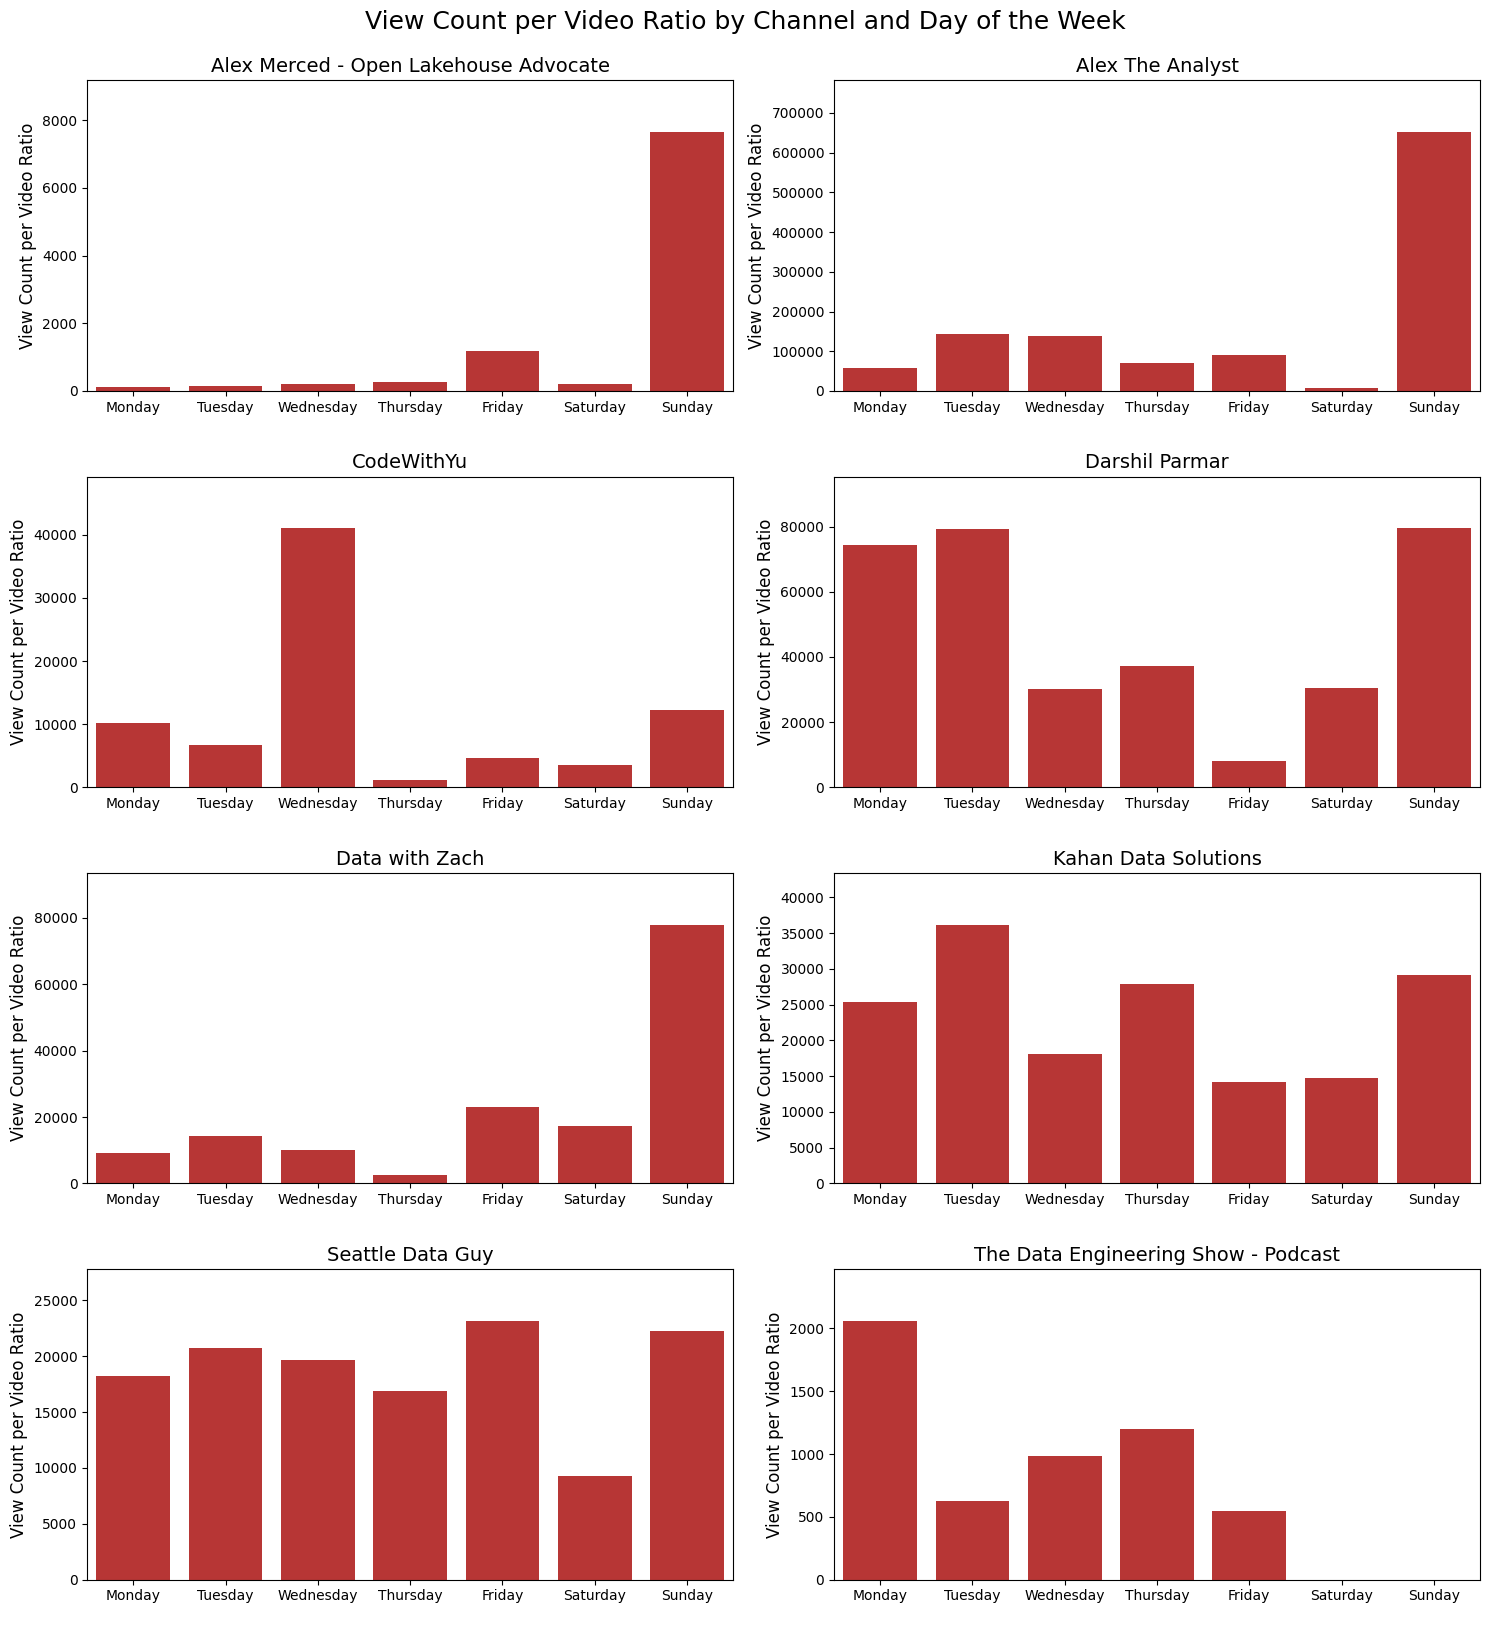

In [20]:
df_grouped = df.groupby(['channelTitle', 'publishedOn']).agg({'viewCount': 'sum', 'id': 'count'}).reset_index()
df_grouped['view_per_video_ratio'] = df_grouped['viewCount'] / df_grouped['id']

df_pivot = df_grouped.pivot(index='publishedOn', columns='channelTitle', values='view_per_video_ratio').fillna(0)

# Set up the number of channels and the number of rows and columns for the subplot
channels = df_pivot.columns
num_channels = len(channels)
ncols = 2
nrows = (num_channels + ncols - 1) // ncols  # Number of rows needed
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows * 4), squeeze=False)
axes = axes.flatten()
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindex the pivot table to match the days of the week
df_pivot = df_pivot.reindex(days_of_week)

for i, channel in enumerate(channels):
    sns.barplot(x=df_pivot.index, y=df_pivot[channel], ax=axes[i], color='#CD201F')
    axes[i].set_title(f'{channel}', fontsize=14)
    axes[i].set_xlabel(' ', fontsize=12)
    axes[i].set_ylabel('View Count per Video Ratio', fontsize=12)
    axes[i].set_ylim(0, df_pivot[channel].max() * 1.2)

# Hide any empty subplots if the number of channels is not a perfect square
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('View Count per Video Ratio by Channel and Day of the Week', fontsize=18, y=1.02)
plt.show()

Five out of seven channels perform best when their videos are uploaded on Sunday (The Data Engineering Show does not upload on Sunday, so it won't be counted). Even Alex the Analyst, who primarily uploads on Tuesday, has a significantly higher view-per-video ratio when videos are uploaded on Sunday. On the other hand, all channels share a common trend: videos uploaded on Saturday have the least views per video. So we might come to a conclusion that these channel should not upload on Saturday to maximine videos' performance.